<a href="https://colab.research.google.com/github/nmaguette/machine_learning_workshops/blob/master/Maguette_D1_2__Logistic_Regression_Breast_Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size=5>Logistic Regression on Breast Cancer Dataset</font></h1>

### Table of contents


- [Data](#data)
- [Data Wrangling](#data_wrangling)
- [Data Statistics](#data_stats)
- [Exploratory Data Analysis](#data_exp)
- [Data Preparation](#data_prep)
- [Logistic Regression from Scratch](#LR_scratch)
- [Logistic Regression using Sklearn](#LR_sklearn)

### Data <a id="data"></a>

In [0]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

&#x270d; How many features does the dataset have?

In [0]:
print('Number of features:', len(dataset.feature_names))

Number of features: 30


### Data Wrangling <a id="data_wrangling"></a>

&#x270d; Convert the dataset into Pandas dataframe for having easier data processing.

In [0]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['class distribution'] = dataset.target
print("Dataset target names:", dataset.target_names)
df.head()

Dataset target names: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class distribution
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Data Statistics <a id="data_stats"></a>

&#x270d; Describe statistics of data including the central tendency, dispersion and shape of the dataset’s distribution.

In [0]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class distribution
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


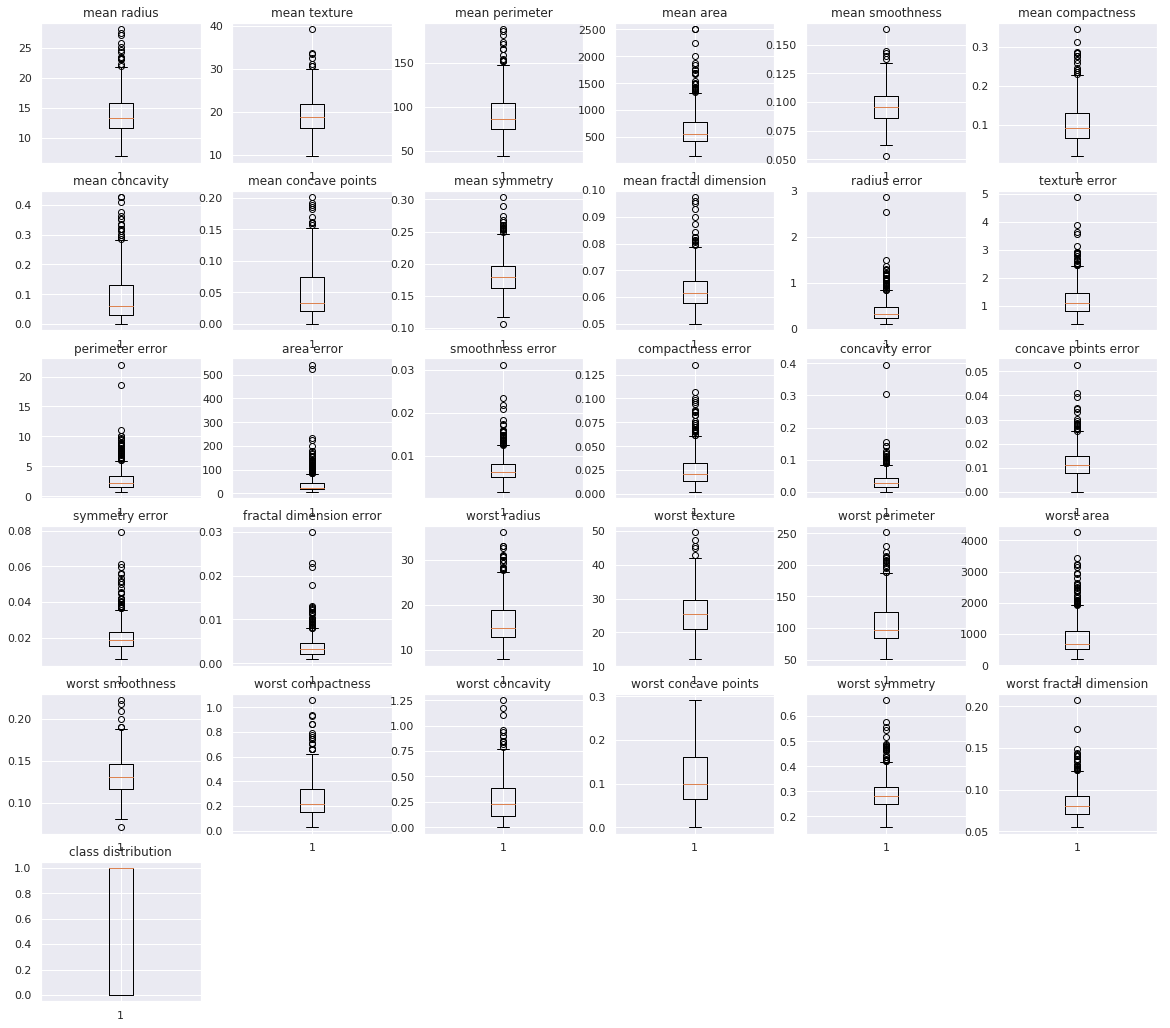

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 18))
for colname, i in zip(df.columns, range(1,len(df.columns)+1)):
  ax = fig.add_subplot(6, 6, i)
  ax.boxplot(df[colname])
  ax.set_title(colname)

plt.show()

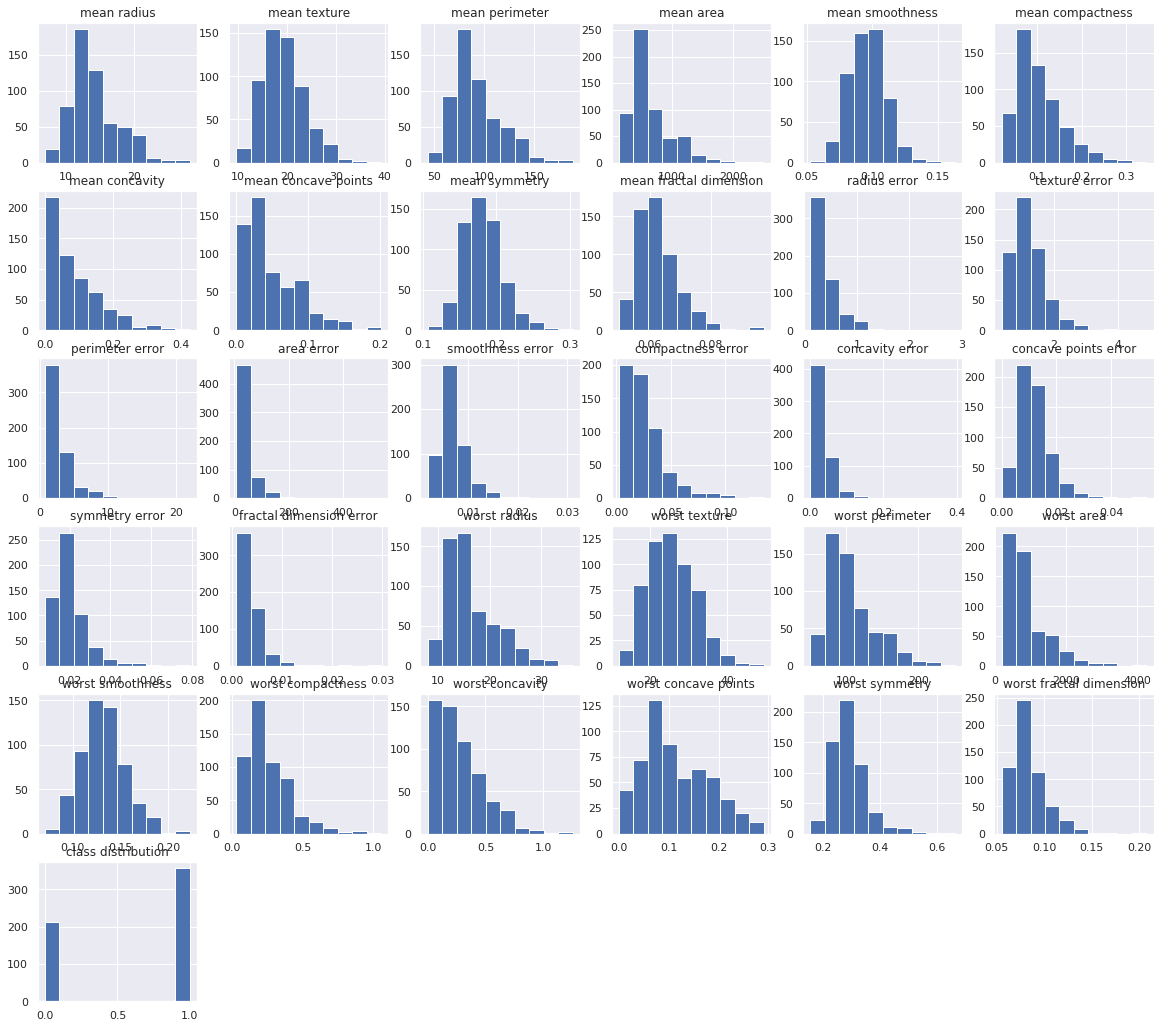

In [0]:
fig2 = plt.figure(figsize=(20, 18))
for colname, i in zip(df.columns, range(1,len(df.columns)+1)):
  ax = fig2.add_subplot(6, 6, i)
  ax.hist(df[colname])
  ax.set_title(colname)

plt.show()

&#x270d; Check if there is any missing value in the dataset.

In [0]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class distribution         0
dtype: int64

### Exploratory Data Analysis <a id="data_exp"></a>

&#x270d; Measure correlation among features.

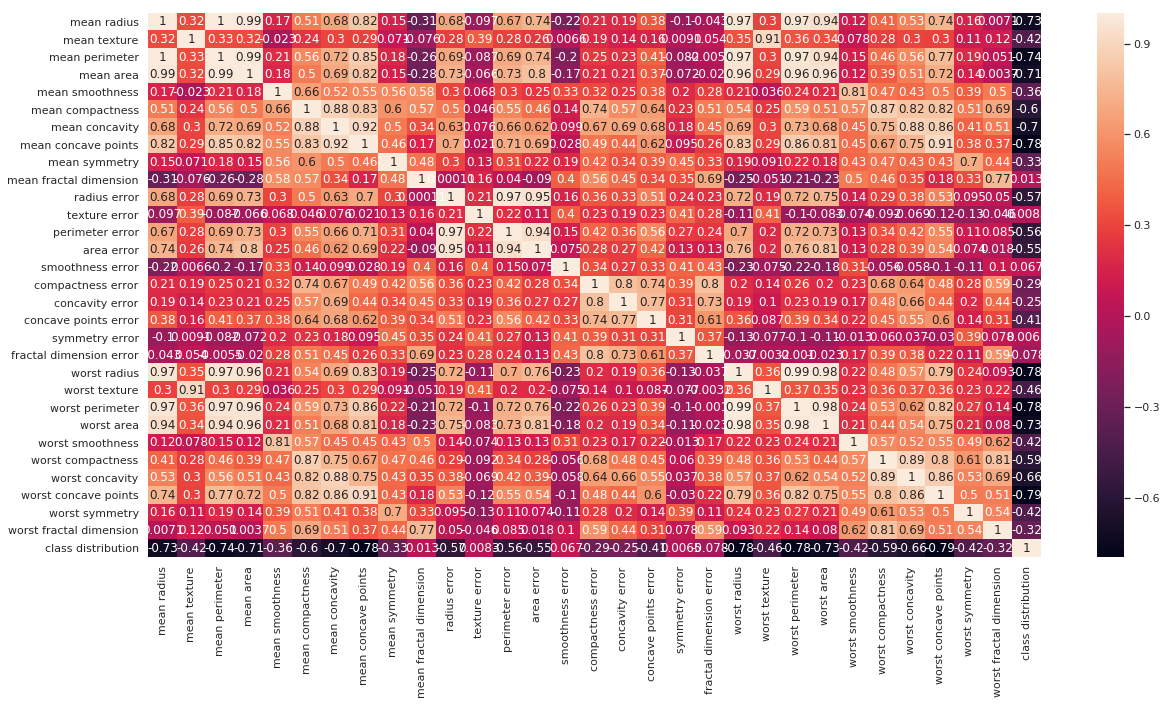

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

correlation_matrix = df.corr()
sns.heatmap(data= correlation_matrix, annot=True)

&#x270d; Pair plot features "worst radius", "worst texture", "worst perimeter", and "worst area", considering the target variable.

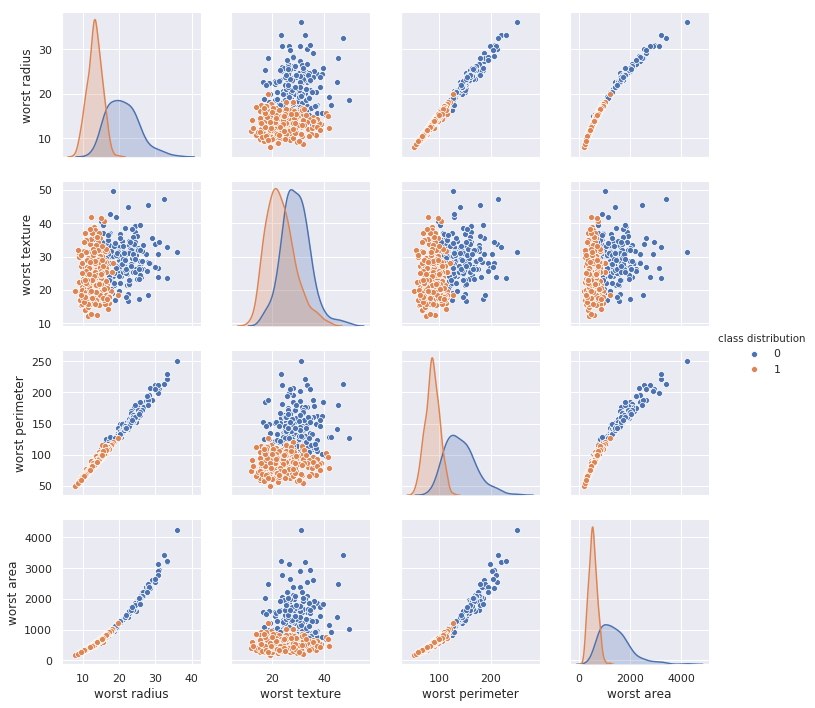

In [0]:
sns.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], data=df, hue='class distribution' )
plt.show()

&#x270d; What are your observations?

<font color='green'>With both the correlation matrix and the pairplot graph we can se that features **worst radius** and **worst area** as well as **worst perimeter** and **worst area** along with the **class distribution** are highly correlated and seems to follow a polynomial regression.\
\
**worst perimeter** and **worst radius** also seems to follow a linear regression.
</font>

&#x270d; What is the class distribution?

Text(0.5, 1.0, 'class distribution')

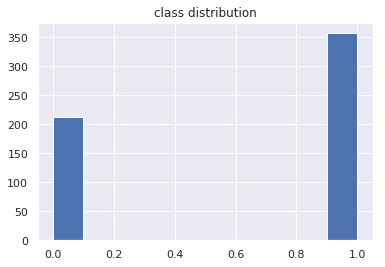

In [0]:
plt.figure(figsize=(6,4))

plt.hist(df['class distribution'])
plt.title('class distribution')

### Data Preparation <a id="data_prep"></a>

&#x270d; Define predictor variable 'X' and target variable 'y'.

In [0]:
X = df.iloc[:,:-1]
y = df['class distribution']

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


&#x270d; Split the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


&#x270d; Standardize the data.

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col_names=X_train.columns
X_train = pd.DataFrame(sc.fit_transform(X_train.values), columns=col_names)
X_test = pd.DataFrame(sc.fit_transform(X_test.values), columns=col_names)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,-0.263800,-0.016052,-0.470414,-0.474761,0.838365,3.251027,8.438937,3.391987,2.621166,2.061208,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,0.805319,-0.812687,0.751957,0.877170,-0.896053,1.181222,0.183628,0.600596,-0.317717,0.529636,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,0.027521,1.963060,-0.120958,-0.350779,0.572766,0.739499,0.320656,0.589462,2.615041,0.718928,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,-0.538505,0.536473,-0.657950,-0.496590,0.065475,-0.822404,-0.685565,-0.898485,0.123299,-0.431547,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,0.402278,0.440382,0.219314,-0.115532,0.171911,-0.787970,-0.783509,-0.588648,2.604015,0.765981,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


### Logistic Regression from Scratch <a id="LR_scratch"></a>

&#x270d; Implement logistic regression from scratch.

In [0]:
#from math import log10

class Logistic_Regression:
    def __init__(self, lr= 0.01, num_iter= 100):
        self.lr = lr
        self.num_iter = num_iter
    
    # Add intercept to input X
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((X, intercept), axis=1)
    
    # Define the sigmoid function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    # Define the cross entropy loss
    def loss(self, y, h):
        self.n = len(h)
        return (1/self.n)*np.sum(-y*np.log(h) - (1-y)*np.log(1-h))
    
    # Fit the model
    def fit(self, X, y):
        
        # Add intercept to X
        X = self.add_intercept(X)
        
        # Initialize parameter theta
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        print('self.theta.shape', self.theta.shape)

        loss_history = []
        
        for i in range(self.num_iter):
            # Calculate output h
            z = X.dot(self.theta)
            h = self.sigmoid(z)
            
            # Calculate the loss and save it in loss_history
            loss_history.append(self.loss(y, h))
            
            # Calculate gradients
            gradient = (1/self.n)*(X.T.dot(h-y))
            
            # Update theta parameters
            self.theta -= self.lr*gradient

        print('h size : ', h.shape)
        print('z size : ', z.shape)

        return loss_history

            
    # Calculate probability estimates
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(X.dot(self.theta))
    
    # Predict class labels for samples in X
    def predict(self, X):
        return self.predict_prob(X).round()

In [0]:
import numpy as np

num_iter = 10000
# Create an instance of the above class
lr = Logistic_Regression(num_iter=num_iter)

# Fit the model over training set
J = lr.fit(X_train, y_train)

# Make predictions over test set
y_test_pred = lr.predict(X_test)

# Measure accuracy over test set
accuracy = (y_test_pred == y_test).mean()
print('Accuracy over test set:', accuracy)

self.theta.shape (31,)
h size :  (455,)
z size :  (455,)
Accuracy over test set: 0.9824561403508771


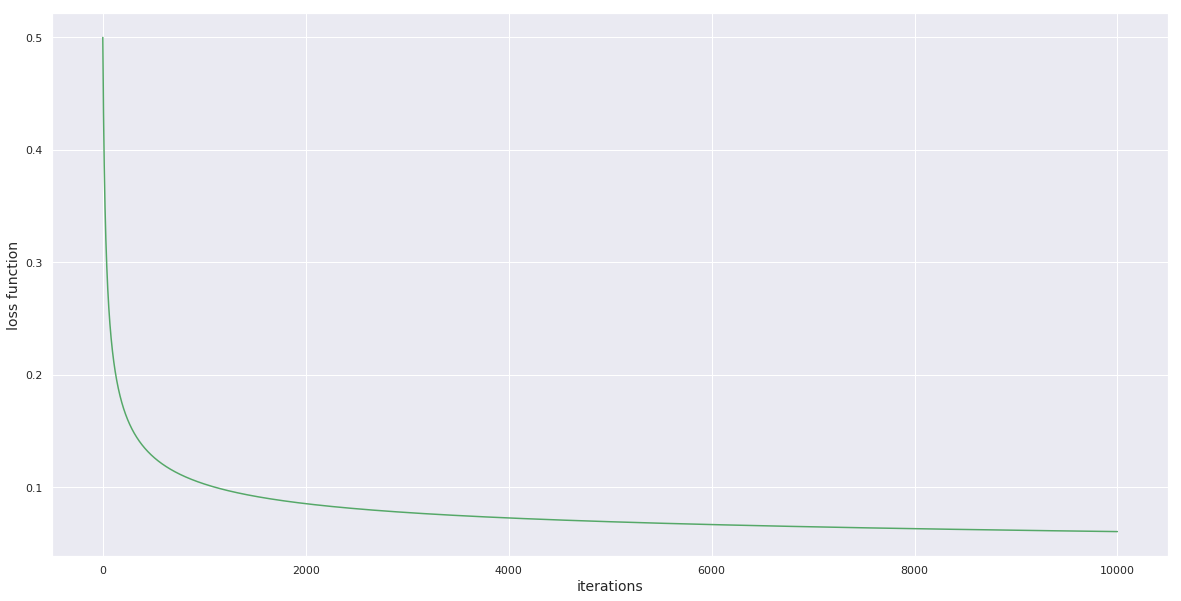

In [0]:
# Plot loss vs training iterations
plt.plot(list(range(num_iter))*np.ones(num_iter), J, 'g')
plt.xlabel('iterations', fontsize = 14)
plt.ylabel('loss function', rotation = 90, fontsize = 14)
plt.show()

### Logistic Regression using Sklearn <a id="LR_sklearn"></a>

&#x270d; Calculate linear regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [0]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

&#x270d; Measure classification accuracy over the training/test sets.

In [0]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.99
Testing Accuracy: 0.98


&#x270d; Build a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [0]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, target_names=dataset.target_names)
print(report)

              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



&#x270d; Compute and plot confusion matrix.

[[41  2]
 [ 0 71]]


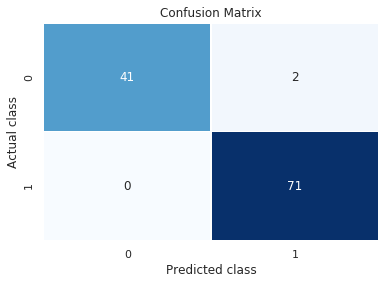

In [0]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
print(cm)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");